# Part I - ProsperLoan Dataset Exploration 
## by Bello Abdulkabir

## Introduction
> For this project i'll be working on the Prosper loan dataset, one of the top lending marketplace in the United States.

## Preliminary Wrangling


In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
df = pd.read_csv('prosperLoanData.csv')
df.sample(5)

ListingKey  ListingNumber            ListingCreationDate  \
85627   95FD3599625403017B38FFE        1144601  2014-01-17 17:24:51.633000000   
45025   E9573549415692373D06E3B         600243  2012-06-15 12:16:44.470000000   
622     2C7B3586796427455CA497C         863999  2013-08-07 21:58:54.803000000   
106871  8BE43424210960899A5B0CB         361775  2008-07-03 15:14:53.723000000   
3851    0F5436043834705525561A5        1247835  2014-03-09 08:02:24.587000000   

       CreditGrade  Term             LoanStatus           ClosedDate  \
85627          NaN    36                Current                  NaN   
45025          NaN    36                Current                  NaN   
622            NaN    60  Past Due (61-90 days)                  NaN   
106871           B    36              Completed  2010-07-07 00:00:00   
3851           NaN    60                Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
85627       0.22108        0.1840       0.1740  ...           -3.40   
45025       0.33973        0.2999       0.2899  ...          -28.27   
622         0.13942        0.1169       0.1069  ...          -49.80   
106871      0.16436        0.1500       0.1400  ...          -71.65   
3851        0.20321        0.1790       0.1690  ...            0.00   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
85627                0.00                    0.0                  0.0   
45025             -122.23                    0.0                  0.0   
622                  0.00                    0.0                  0.0   
106871               0.00                    0.0                  0.0   
3851                 0.00                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
85627                              0.0            1.0                0   
45025                              0.0            1.0                0   
622                                0.0            1.0                0   
106871                             0.0            1.0                0   
3851                               0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
85627                           0                         0.0         1  
45025                           0                         0.0         7  
622                             0                         0.0       376  
106871                          0                         0.0       199  
3851                            0                         0.0         1  

[5 rows x 81 columns]

In [21]:
df.shape

(113937, 81)

In [22]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [24]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### Dataset Structure

> The prosperLoan data consists of 113,937 loan appication with 81 features. Although, not all 81 features are needed for the purpose of the project. All variables are ints, objects, booleans and floats.

### What is/are the main feature(s) of interest in your dataset?

> My major interest with the avaliable data are:
  
  - what factors affect loan outcome status
  - what factors higher interest rate when applying for a loan
 
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that the income of an applicant is a determining factor of the interest rate involved. also, i assume that an applicant that has deliquencies over the years won't affect the loan amount he/she is eligible to borrow as people tend to process loans to pay off other debts.

## Univariate Exploration


##### QUESTION
what is the distribution of the original loan amount?


##### VISUALIZATION

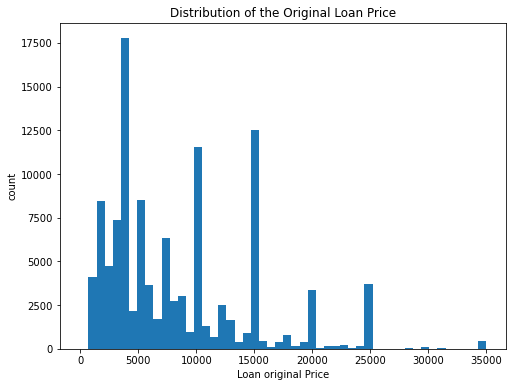

In [184]:
plt.figure(figsize=(8,6))
bin_edges = np.arange(0, df.LoanOriginalAmount.max()+500, 700)
plt.hist(data=df, x='LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan original Price')
plt.ylabel('count')
plt.title('Distribution of the Original Loan Price');

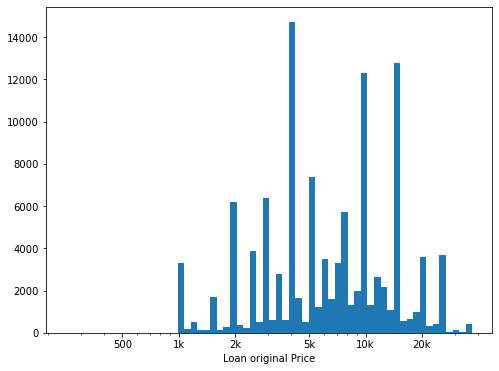

In [84]:
plt.figure(figsize=(8,6))
log_binsize = 0.035
bins = 10 ** np.arange(2.4, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan original Price')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);

##### OBSERVATION
As depicted in the graph above, there's a high peak of frequency in loan amount slightly below 5000, 10,000 and 15,000. with the highest peak being at 4000 which is the most reoccuring loan amount in the dataset. medium frequency peaks are seen on 1000, 5000, and 7000

##### QUESTION
what's the distribution of the servicing fee in our entire dataset?

##### VISUALIZATION

In [93]:
# i'll be using feature enginnering to create a new column called "servicing_fee"
df['servicing_fee'] = df.BorrowerRate - df.LenderYield
df.servicing_fee

0         0.020
1         0.010
2         0.035
3         0.010
4         0.010
          ...  
113932    0.010
113933    0.010
113934    0.010
113935    0.010
113936    0.010
Name: servicing_fee, Length: 113937, dtype: float64

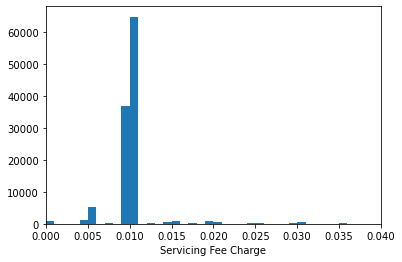

In [116]:
bin_edges = np.arange(0, df.servicing_fee.max()+5, 0.001)
plt.hist(data=df, x='servicing_fee', bins=bin_edges)
plt.xlim(0,0.04)
plt.xlabel('Servicing Fee Charge');

##### OBSERVATION
In our loan dataset the service fee charged for almost all loans fall under the 0.010 mark with a few having their distribution lesser than that.

##### QUESTION 
what's the employment status of the loan applicants in the given data?

##### VISUALIZATION

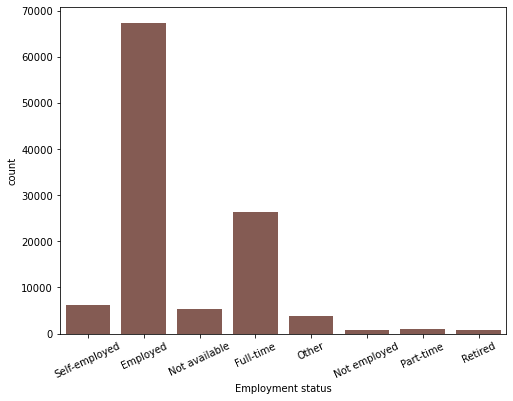

In [26]:
base_color = sns.color_palette()[5]
plt.figure(figsize=(8,6))
sns.countplot(data=df, x= 'EmploymentStatus', color=base_color)
plt.xticks(rotation=25)
plt.xlabel('Employment status');

##### OBSERVATION
As seen in the bar chart above, most loan appliacants are either employed or working full-time while a smaller fraction of the applicants are retired, not-employed or working part-time.

##### QUESTION
what are the frequency of the borrower interest rate, borrower annual percentage rate and estimated return


##### VISUALIZATION

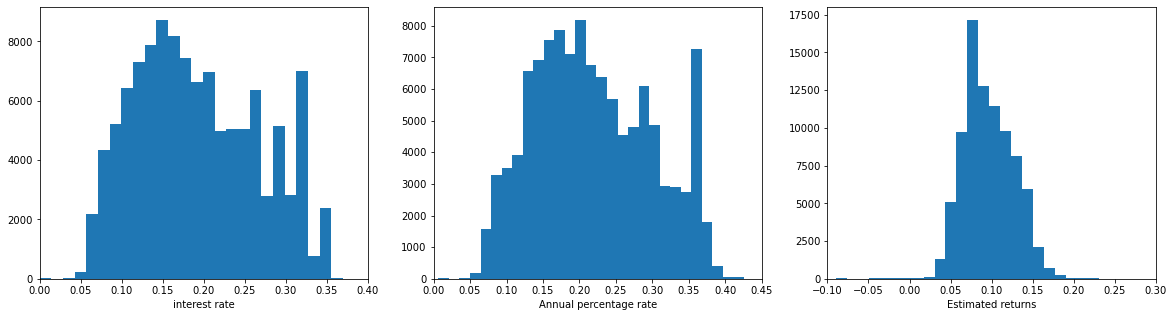

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(data = df, x='BorrowerRate', bins=35)
plt.xlim(0,0.4)
plt.xlabel('interest rate')
plt.subplot(1,3,2)
plt.hist(data=df, x='BorrowerAPR', bins=35)
plt.xlim(0,0.45)
plt.xlabel('Annual percentage rate')
plt.subplot(1,3,3)
plt.hist(data=df, x='EstimatedReturn', bins=35)
plt.xlim(-0.1,0.3)
plt.xlabel('Estimated returns');

##### OBSERVATIONS
The borrower interest rate, borrower annual percentage rate and the estimated returns all follow a normal distribution.The interest rate having its highest peak at 0.13 and from there it gradually decreseas until it reaches 0.33 where it rises up again. the annual percentage rate has its highest frequncy of occurance at the 0.20-0.22 mark with over 8,000 loan applicants having their annual percentage rate within the range of 0.20-0.22 .lastly, the most occuring estimated returns is at 0.8 percent.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did I need to perform any transformations?

> There are no unsual points that was noticed in the dataset. a transformation was done on the dataset by using feature engineering to create a new column that contains the service fee for each loan.

### Of the features I investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

> No changes were made to the data asides the addition of a new column that was stated earlier. And this was done so as to know the distribution of the service fee in our entire dataset.

## Bivariate Exploration

##### QUESTION
What factors affect loan outcome status? 
to better understand and answer the question above, i'll have to check if there are any relationship between the following quantitative variables: 
- BorrowerAPR
- Interest rate
- Estimated loss
- Estimated return
- stated monthly income
- loan original amount
- monthly loan payment
- Deliquencies last 7 years

In [28]:
# to avoid overplotting i will be creating a smaller subset of data to work with
np.random.seed(1)
smaller_df_subset = df.sample(700)

In [29]:
smaller_df_subset.shape

(700, 81)

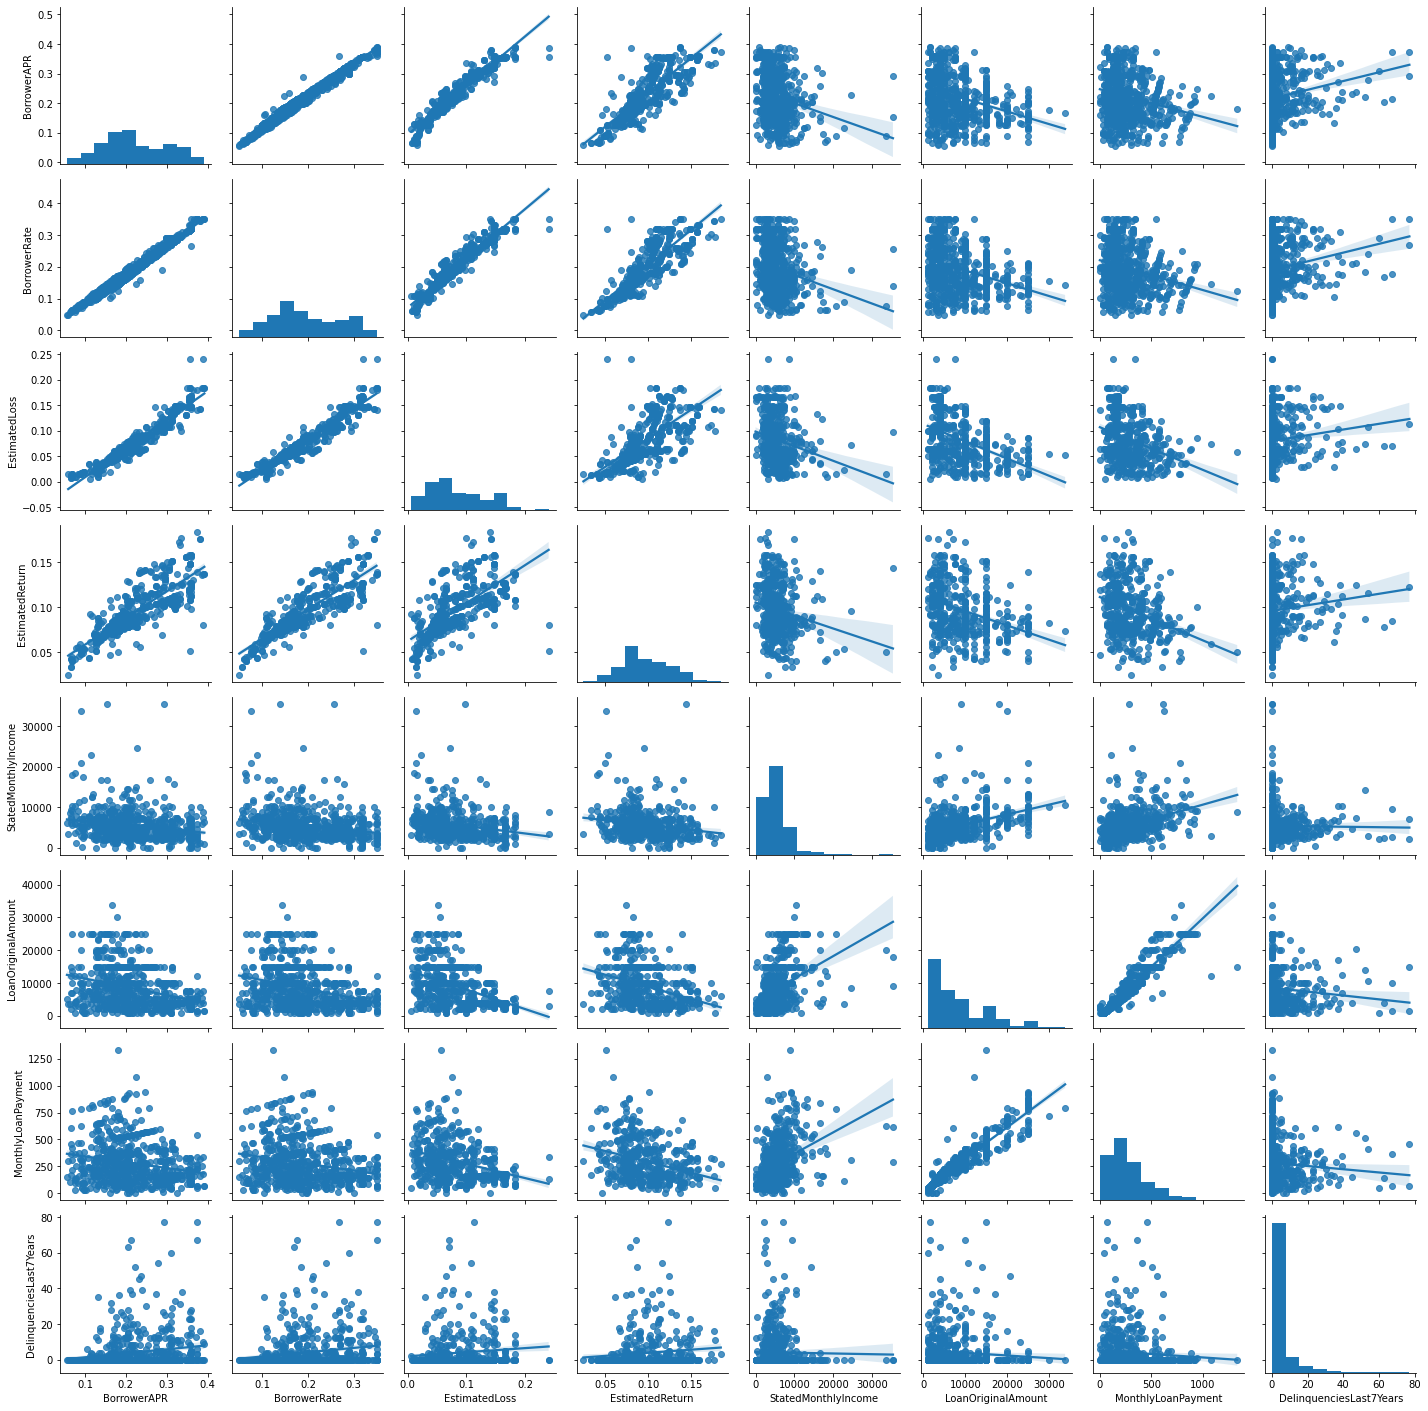

In [30]:
cols_to_use = ['BorrowerAPR','BorrowerRate','EstimatedLoss','EstimatedReturn',
               'StatedMonthlyIncome',
               'LoanOriginalAmount','MonthlyLoanPayment', 'DelinquenciesLast7Years']
g= sns.PairGrid(data=smaller_df_subset, vars=cols_to_use)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)

##### OBSERVATIONS
The PairGrid above shows us a lot of positive correlations between different variables. Through this visualization i am able to see that my assumption was wrong regarding the income of a loan applicant being a determining factor of the interest rate placed on the loan. Although, my second assumption was correct as any loanee that have any record of debt in the past 7 years does their application for a loan as it's not strongly correlated to any of the given variables.
Our plot also shows us that the higher the loan amount, the higher the monthly loan payment. The borrower rate is directly proportional to the estimated return, borrower annual percentage rate and the estimated loss.

##### QUESTION
Do the number of investors have any relationship with the loan amount?

##### VISUALIZATION

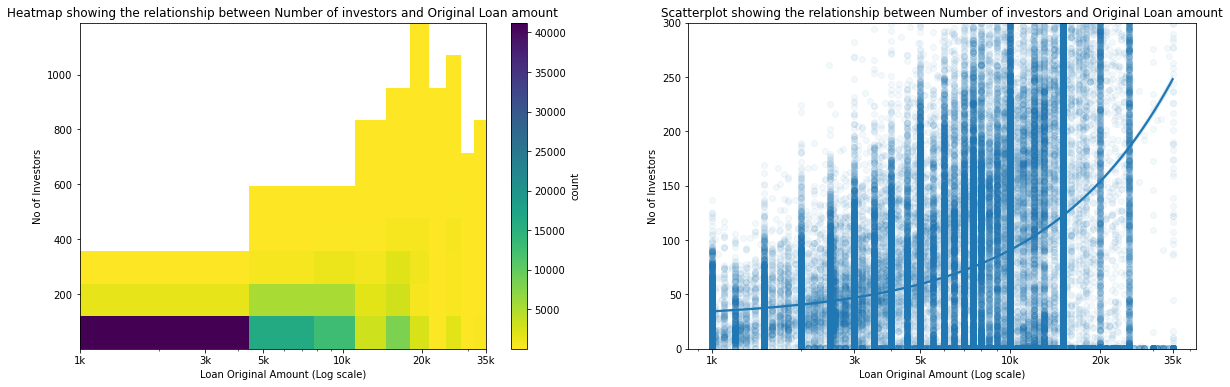

In [187]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist2d(data=df, x='LoanOriginalAmount', y='Investors', cmin=1, cmap='viridis_r')
bar_color = plt.colorbar()
bar_color.set_label('count')
plt.xscale('log')
plt.xticks([1e3,3e3,5e3,1e4,2e4,35e3], ['1k','3k','5k','10k','20k','35k'])
plt.xlabel('Loan Original Amount (Log scale)')
plt.ylabel('No of Investors')
plt.title('Heatmap showing the relationship between Number of investors and Original Loan amount')
plt.subplot(1,2,2)
sns.regplot(data=df, x='LoanOriginalAmount', y='Investors', scatter_kws={'alpha':1/20})
plt.xscale('log')
plt.xticks([1e3,3e3,5e3,1e4,2e4,35e3], ['1k','3k','5k','10k','20k','35k'])
plt.ylim(0,300)
plt.xlabel('Loan Original Amount (Log scale)')
plt.ylabel('No of Investors')
plt.title('Scatterplot showing the relationship between Number of investors and Original Loan amount');

##### OBSERVATION
There is observed  to be a strong correlation with the loan original amount and the number of investors that sponsored the loan. This brings me to the assumption that a sinlge investor will find it financially daunting to loan out a huge amount of money (in the range of 25,000 - 35,000 dollars). Also, in the heatmap depicted we can see that most of the loanees in the dataset borrowed a sum ranging from 1,000 - 4,500 dollars.

##### QUESTION
Do loanees who are employed tend to have a higher borrower rate than those that are not employed?

In [130]:
# i only want loanees who specified their employment status (that is, loanees who didn't classify their employment status under "not avaliable" or "other")
df_sub = df.loc[~df.EmploymentStatus.isin(['Not available', 'Other'])]
df_sub.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [131]:
# then in the newly created dataframe i'll categorize the EmploymentStatus column and change its dataframe to categorical datatype
employment_cat = ['Not employed', 'Part-time', 'Full-time', 'Self-employed', 'Employed', 'Retired']
ord_cat = pd.api.types.CategoricalDtype (categories = employment_cat, ordered = True) 
df_sub.EmploymentStatus = df_sub.EmploymentStatus.astype(ord_cat,)

C:\Users\user\AppData\Local\Temp\ipykernel_12616\4275879452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.EmploymentStatus = df_sub.EmploymentStatus.astype(ord_cat,)


In [132]:
df_sub.EmploymentStatus.dtype

CategoricalDtype(categories=['Not employed', 'Part-time', 'Full-time', 'Self-employed',
                  'Employed', 'Retired'],
, ordered=True)

##### VISUALIZATION

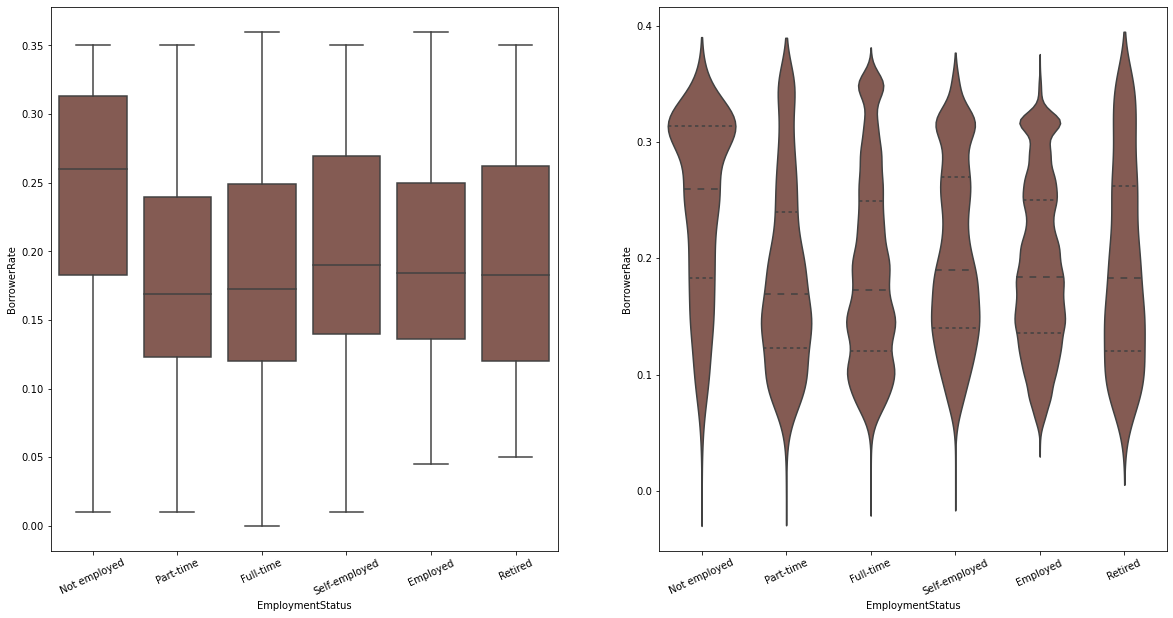

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
base_color = sns.color_palette()[5]
sns.boxplot(data=df_sub, x='EmploymentStatus', y='BorrowerRate', color = base_color)
plt.xticks(rotation = 25)
plt.subplot(1,2,2)
sns.violinplot(data=df_sub,x='EmploymentStatus', y='BorrowerRate', color = base_color, inner='quartile')
plt.xticks(rotation = 25);


##### OBSERVATION
Surprisngly loanees who are unemployed have the highest borrower rate as seen in the plot. We can see the borrower rate decresing from left to right till it gets to "self-employed" where it slightly increases. Although as depicted in the violin plot loanees who are employed, self-employed or working full-time have some of their distribution having a high borrower rate falling under the 0.3 to 0.35 mark. 

##### QUESTION
What's the employment status of home owners?

##### VISUALIZAION

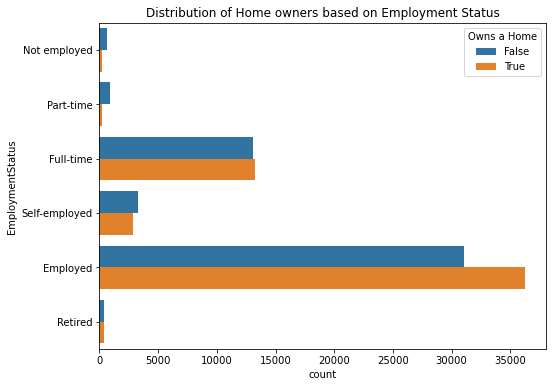

In [149]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_sub, y='EmploymentStatus', hue='IsBorrowerHomeowner')
plt.legend(title = 'Owns a Home')
plt.title('Distribution of Home owners based on Employment Status');

##### OBSERVATION
Most home owners in our dataset are either employed or working full-time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did I need to perform any transformations?

> Due to overplotting i had to take a random subset of 700 samples from my dataset so as to provide more visual readablity of my plots. The Borrower annual percentage rate had a very strong correlation with the estimated return, estimated loss, and the interest rate. the borrower APR also had a slight negative correlation with the monthly loan payment

### Of the features I investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

> Some loanees had selected "Not avaliable" or "Other" as their Employment status. This was not deemed to be a valid response to an individual employment status so i filtered down my data to remove rows of this kind, then i changed the datatype of the employment status column from an object datatype to a categorical datatype.

## Multivariate Exploration

##### QUESTION
> Do loanees who own a home borrow larger amounts than those who don't?
 Also, do loanees who are unemployed or part-time workers tend to borrow larger amounts of money for their needs or start-up businesses than loanees who have a better and steady source of income? 

##### VISUALIZATION

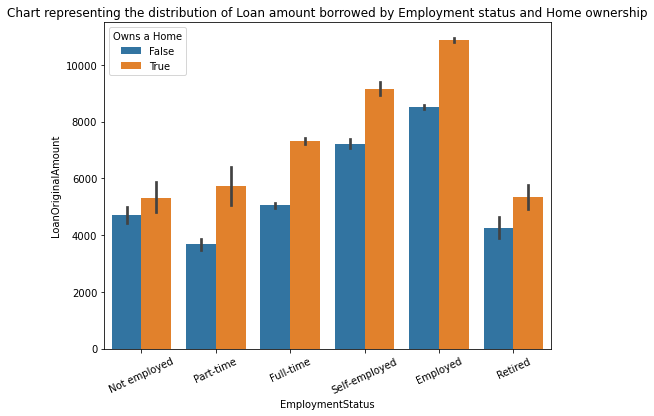

In [117]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_sub, x='EmploymentStatus', y ='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xticks(rotation=25)
plt.legend(title='Owns a Home')
plt.title('Chart representing the distribution of Loan amount borrowed by Employment status and Home ownership');

##### OBSERVATION
It's seen clearly that loanees who own a home borrow larger amounts than those who do not. Also, one can depict from the data that generally, loanees who are employed borrow larger amounts of loan than others and there's a positive rise in the amount of loan borrowed from left to right (from **Not-Employed** up to **Employed**) till it gets to loanees who are retired from the workforce.

##### QUESTION
Does a higher loan duration atract a higher interest rate and returns or there's no valueable correlation betwen the three variables? 

##### VISUALIZATION

Text(0.5, 1.0, 'Distribution of Loan Term with interest rate and Returns')

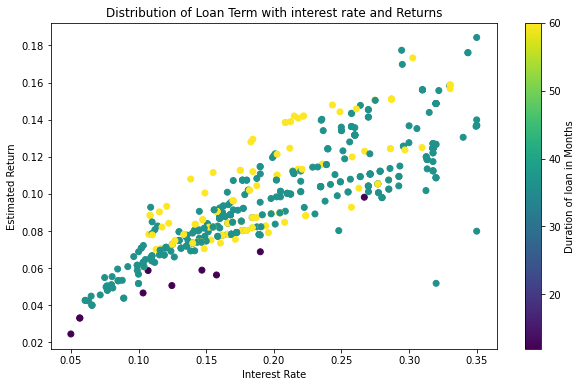

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(data = smaller_df_subset, x='BorrowerRate', y='EstimatedReturn', c='Term')
cbar = plt.colorbar()
cbar.set_label('Duration of loan in Months')
plt.xlabel('Interest Rate')
plt.ylabel('Estimated Return')
plt.title('Distribution of Loan Term with interest rate and Returns')

##### OBSERVATION
It seems to be the case that the higher the loan duration, the higher the estimated return and interest rate. As seen in the plot we have the months with the hghest loan term being slighty above the months with a loan duration of 30-36 months. Although, some outliers can be seen having a shorter loan duration that falls within that range (of 30-36 months) and still having a high interest rate than the 60 months loan period.
the black dots in the plot represents the distribution of loan periods between 10-20 months. Not only can we see that the lower loan duration tend to attract lower interest rate and estimated return but we can also see that the distribution of loanees who have a very short loan duration are small in number as we can easily count the amount of black dots in the scatterplot above.

##### QUESTION 
Does a higher loan amount have any positive influence on the loan status of a loanee based on their employment? 

##### VISUALIZATION


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


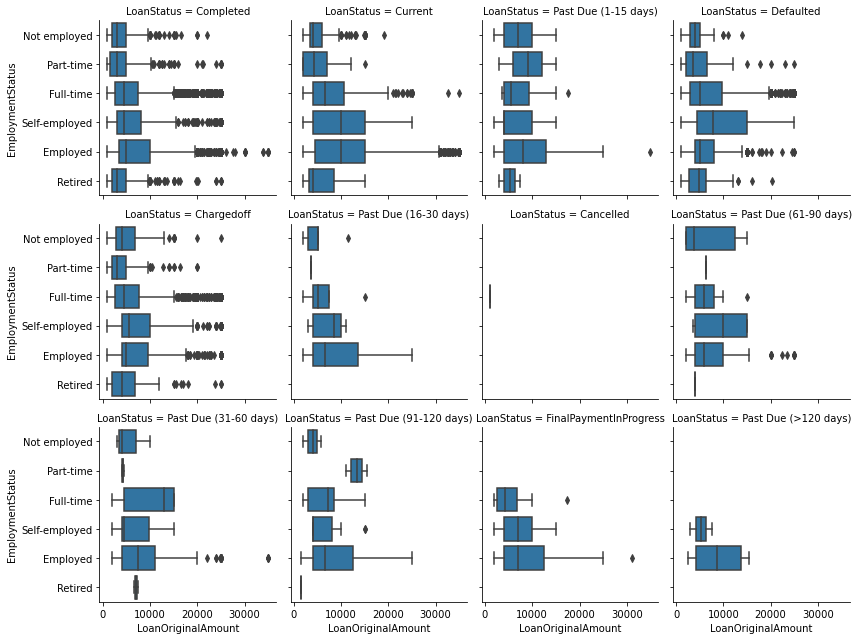

In [179]:
g = sns.FacetGrid(data=df_sub, col = 'LoanStatus', col_wrap = 4)
g.map(sns.boxplot, 'LoanOriginalAmount', 'EmploymentStatus')


##### OBSERVATION
It can be observed that the distribution of loanees who have completed their loan payments are those who are employed. Although one should'nt forget that in our exploratory visualizaton that was done earlier for univariate exploration, it showed that a large number of our loanees are employed or working full-time. This makes it more clear to why the distribution of those who are employed or full-time workers are larger in most of the distribution scale than the rest. Also, one can observe that most loanees who are unemployed have their loan status to be past due(61-90 days). Overall we can see that there's no correlation between the loan amount and the loan status. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at the feature(s) of interest?

> It was observed that there was a trend among loanees in our dataset who are not home owners as they borrow a lesser amount than those who own a home. Also i noticed that there's a positive corelation between the term/duration of the loan and the interest rate it attracts. 

### Were there any interesting or surprising interactions between features?

> there doesn't seem to be any noticable interaction between the original loan amount, employment status and loan status.

## Conclusions
> Upon investigating my dataset using different visualization techniques i was able to get a ton of valuable insights.I selected some columns from my data that i deemed intersting then took a random sample from my original dataset to avoid overplotting, and using Pair-Grid i was able to check for correlations and relationships between my selected columns. There seem to be a slight negative correlation between the loan original amount and the estiated returns. Factors that were observed to positively have an effect on the loan status are the Interest rate, Borrower annual percentage rate and the estimated loss.  the duration of loan also has an effect on the loan outcome as a higher loan duration attracts higher rates.  
